In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf,keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [3]:
data=pd.read_csv('USA.csv')

In [4]:
#data.drop("GSNR_1", axis=1, inplace=True)
data['No. Spans'].value_counts()

11    6000
23    3000
30    3000
25    3000
46    3000
24    3000
6     3000
57    3000
22    3000
44    3000
Name: No. Spans, dtype: int64

In [5]:
data.head(5)

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_71,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,No. Spans,Total Distance(m),GSNR_1,GSNR_class
0,0.000000,0.000000,0.000096,0.000096,0.000096,0.000000,0.000096,0.0,0.000096,0.0,...,0.000000,0.000000,0.000000,26.391513,0.000000,0.000000,23,2050305,0.000000,0
1,0.000000,0.000096,0.000000,0.000096,0.000000,0.000096,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,25.764675,0.000000,0.000000,0.000000,23,2050305,0.000000,0
2,0.000000,0.000000,0.000000,0.000096,0.000000,0.000000,0.000000,0.0,0.000096,0.0,...,25.759626,0.000000,0.000000,0.000000,24.616361,24.297057,23,2050305,0.000000,0
3,0.000096,0.000096,0.000096,0.000096,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,21.235013,22.810189,0.000000,0.000000,0.000000,0.000000,23,2050305,22.651367,1
4,0.000000,0.000000,0.000096,0.000000,0.000096,0.000000,0.000000,0.0,0.000096,0.0,...,22.666472,21.211149,21.131602,21.349516,22.572032,0.000000,23,2050305,0.000000,0


In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
print("X ",X.shape)
print("y ",y.shape)
y.value_counts()

X  (33000, 306)
y  (33000,)


0    22182
1    10818
Name: GSNR_class, dtype: int64

In [14]:
#splitting the data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#=========converting to array===================
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
#=========reshaping=============================
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
#===========printing Shapes======
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(26400, 306)
(26400, 1)
(6600, 306)
(6600, 1)


In [15]:
#===========scalling================
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
model=tf.keras.Sequential([
tf.keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[1],),kernel_initializer='he_normal'),
tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(16,activation='relu',kernel_initializer='he_normal'),
tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='he_normal')
],name='USA-Teacher')


In [17]:
model.summary()

Model: "USA-Teacher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               78592     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 122,369
Trainable params: 122,369
Non-tra

In [18]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model_history=model.fit(X_train,y_train,epochs=40,batch_size=X_train.shape[0],validation_data=(X_test,y_test))

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 0.7738 - accuracy: 0.6584 - val_loss: 0.6424 - val_accuracy: 0.6203
Epoch 2/40
1/1 [==============================] - 0s 158ms/step - loss: 0.6354 - accuracy: 0.6366 - val_loss: 0.5962 - val_accuracy: 0.6526
Epoch 3/40
1/1 [==============================] - 0s 235ms/step - loss: 0.5866 - accuracy: 0.6717 - val_loss: 0.5472 - val_accuracy: 0.6844
Epoch 4/40
1/1 [==============================] - 0s 226ms/step - loss: 0.5361 - accuracy: 0.7030 - val_loss: 0.5169 - val_accuracy: 0.6955
Epoch 5/40
1/1 [==============================] - 0s 181ms/step - loss: 0.5048 - accuracy: 0.7110 - val_loss: 0.4990 - val_accuracy: 0.7065
Epoch 6/40
1/1 [==============================] - 0s 166ms/step - loss: 0.4860 - accuracy: 0.7215 - val_loss: 0.4747 - val_accuracy: 0.7202
Epoch 7/40
1/1 [==============================] - 0s 200ms/step - loss: 0.4615 - accuracy: 0.7365 - val_loss: 0.4448 - val_accuracy: 0.7483
Epoch 8/40
1/1 [=======

In [20]:
model.evaluate(X_test, y_test, verbose=1)

207/207 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 0.9995


[0.004253116436302662, 0.9995454549789429]

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

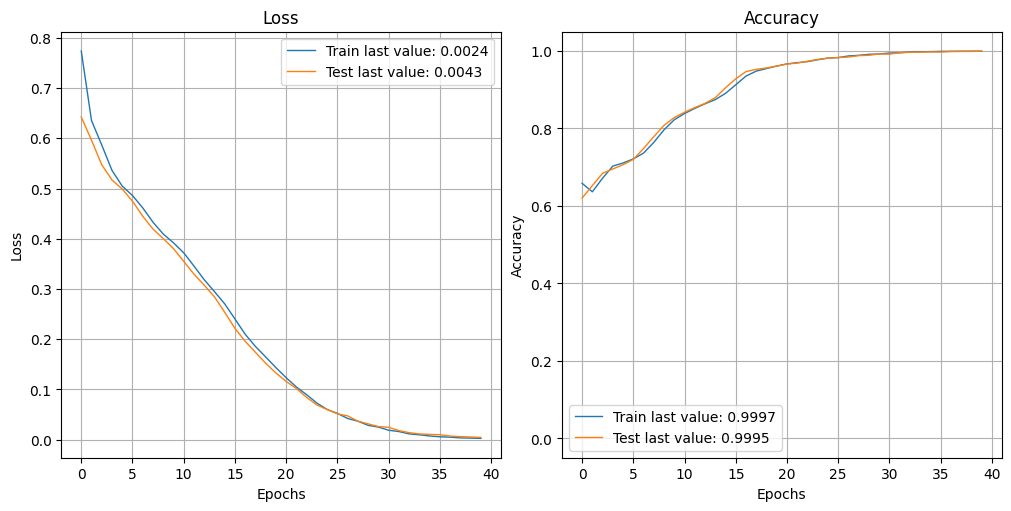

In [21]:
from plot_keras_history import plot_history
plot_history(model_history,show_standard_deviation=False,show_average=True)

In [22]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred)
report = classification_report(y_test, y_pred)
print(report)

207/207 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4422
           1       1.00      1.00      1.00      2178

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [26]:
model.save('USA-MODEL.h5')